| Column name               | Description                                                                            | Value range                                             |
|---------------------------|----------------------------------------------------------------------------------------|---------------------------------------------------------|
| trustLevel                | A customer's individual trust level. 6: Highest trustworthiness                        | {1,2,3,4,5,6}                                           |
| totalScanTimeInSeconds    | Total time in seconds between the first and last product scanned                       | Positive whole number                                   |
| grandTotal                | Grand total of products scanned                                                        | Positive decimal number with maximum two decimal places |
| lineItemVoids             | Number of voided scans                                                                 | Positive whole number                                   |
| scansWithoutRegistration  | Number of attempts to activate the scanner without actually scanning anything          | Positive whole number or 0                              |
| quantityModification      | Number of modifiedquantities for one of thescanned products                            | Positive whole number or 0                              |
| scannedLineItemsPerSecond | Average number of scanned products per second                                          | Positive decimal number                                 |
| valuePerSecond            | Average total value of scanned products per second                                     | Positive decimal number                                 |
| lineItemVoidsPerPosition  | Average number of item voids per total number of all scanned and notcancelled products | Positive decimal number                                 |
| fraud                     | Classification as fraud (1)or not fraud (0)                                            | {0,1}                                                   |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
train = pd.read_csv("../data/train.csv", sep="|")

In [3]:
test = pd.read_csv("../data/test.csv", sep="|")

<h1 style="font-size:3em; color:royalblue">Descriptive Statistics</h1>

In [4]:
train.shape

(1879, 10)

In [5]:
test.shape

(498121, 9)

In [6]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [7]:
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [8]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [9]:
train.fraud.value_counts()

0    1775
1     104
Name: fraud, dtype: int64

<h3 style="color:green"> $\Rightarrow$ Only 104 frauds out of 1879 instances </h3>

<h1 style="font-size:3em; color:royalblue">Handling missing data</h1>

In [10]:
train.isnull().values.any()

False

In [11]:
train.isnull().any()

trustLevel                   False
totalScanTimeInSeconds       False
grandTotal                   False
lineItemVoids                False
scansWithoutRegistration     False
quantityModifications        False
scannedLineItemsPerSecond    False
valuePerSecond               False
lineItemVoidsPerPosition     False
fraud                        False
dtype: bool

<h3 style="color:green"> $\Rightarrow$ There are no NULL values in the data -> no imputation is needed </h3>

<h1 style="font-size:3em; color:royalblue">Correlation</h1>

In [12]:
train.corr()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
trustLevel,1.000000,0.025264,0.047656,-0.017312,0.017296,0.006506,0.030701,0.027626,0.009241,-0.319765
totalScanTimeInSeconds,0.025264,1.000000,-0.001230,0.019068,0.009066,-0.011415,-0.262988,-0.208450,-0.011623,0.110414
grandTotal,0.047656,-0.001230,1.000000,0.006321,-0.030573,-0.008163,-0.011885,0.075679,-0.008858,0.001421
lineItemVoids,-0.017312,0.019068,0.006321,1.000000,-0.017023,-0.007173,-0.004438,0.005114,0.346514,0.063496
scansWithoutRegistration,0.017296,0.009066,-0.030573,-0.017023,1.000000,0.018961,-0.024126,-0.018844,0.002834,0.074123
quantityModifications,0.006506,-0.011415,-0.008163,-0.007173,0.018961,1.000000,-0.014880,0.010548,0.018318,-0.000864
scannedLineItemsPerSecond,0.030701,-0.262988,-0.011885,-0.004438,-0.024126,-0.014880,1.000000,0.692152,-0.056316,-0.023085
valuePerSecond,0.027626,-0.208450,0.075679,0.005114,-0.018844,0.010548,0.692152,1.000000,0.019886,-0.028873
lineItemVoidsPerPosition,0.009241,-0.011623,-0.008858,0.346514,0.002834,0.018318,-0.056316,0.019886,1.000000,-0.090116
fraud,-0.319765,0.110414,0.001421,0.063496,0.074123,-0.000864,-0.023085,-0.028873,-0.090116,1.000000


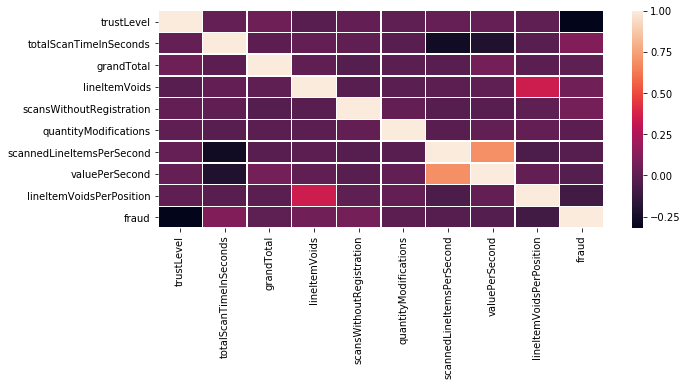

In [13]:
fig, ax = plt.subplots(figsize=(10,4
                               )) 
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)

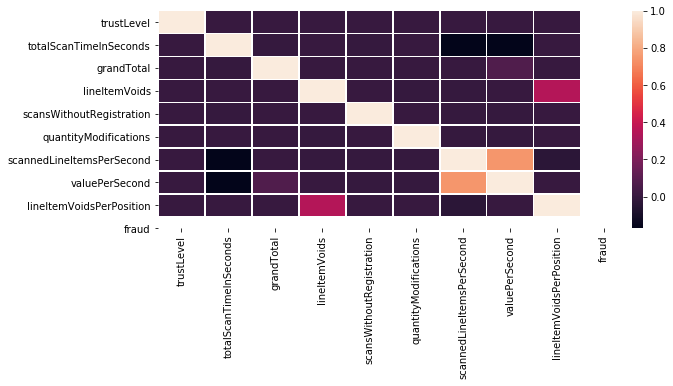

In [14]:
fig, ax = plt.subplots(figsize=(10,4
                               )) 
corr_test = test.corr()
sns.heatmap(corr_test, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)

<h1 style="font-size:3em; color:royalblue">Data distribution</h1>

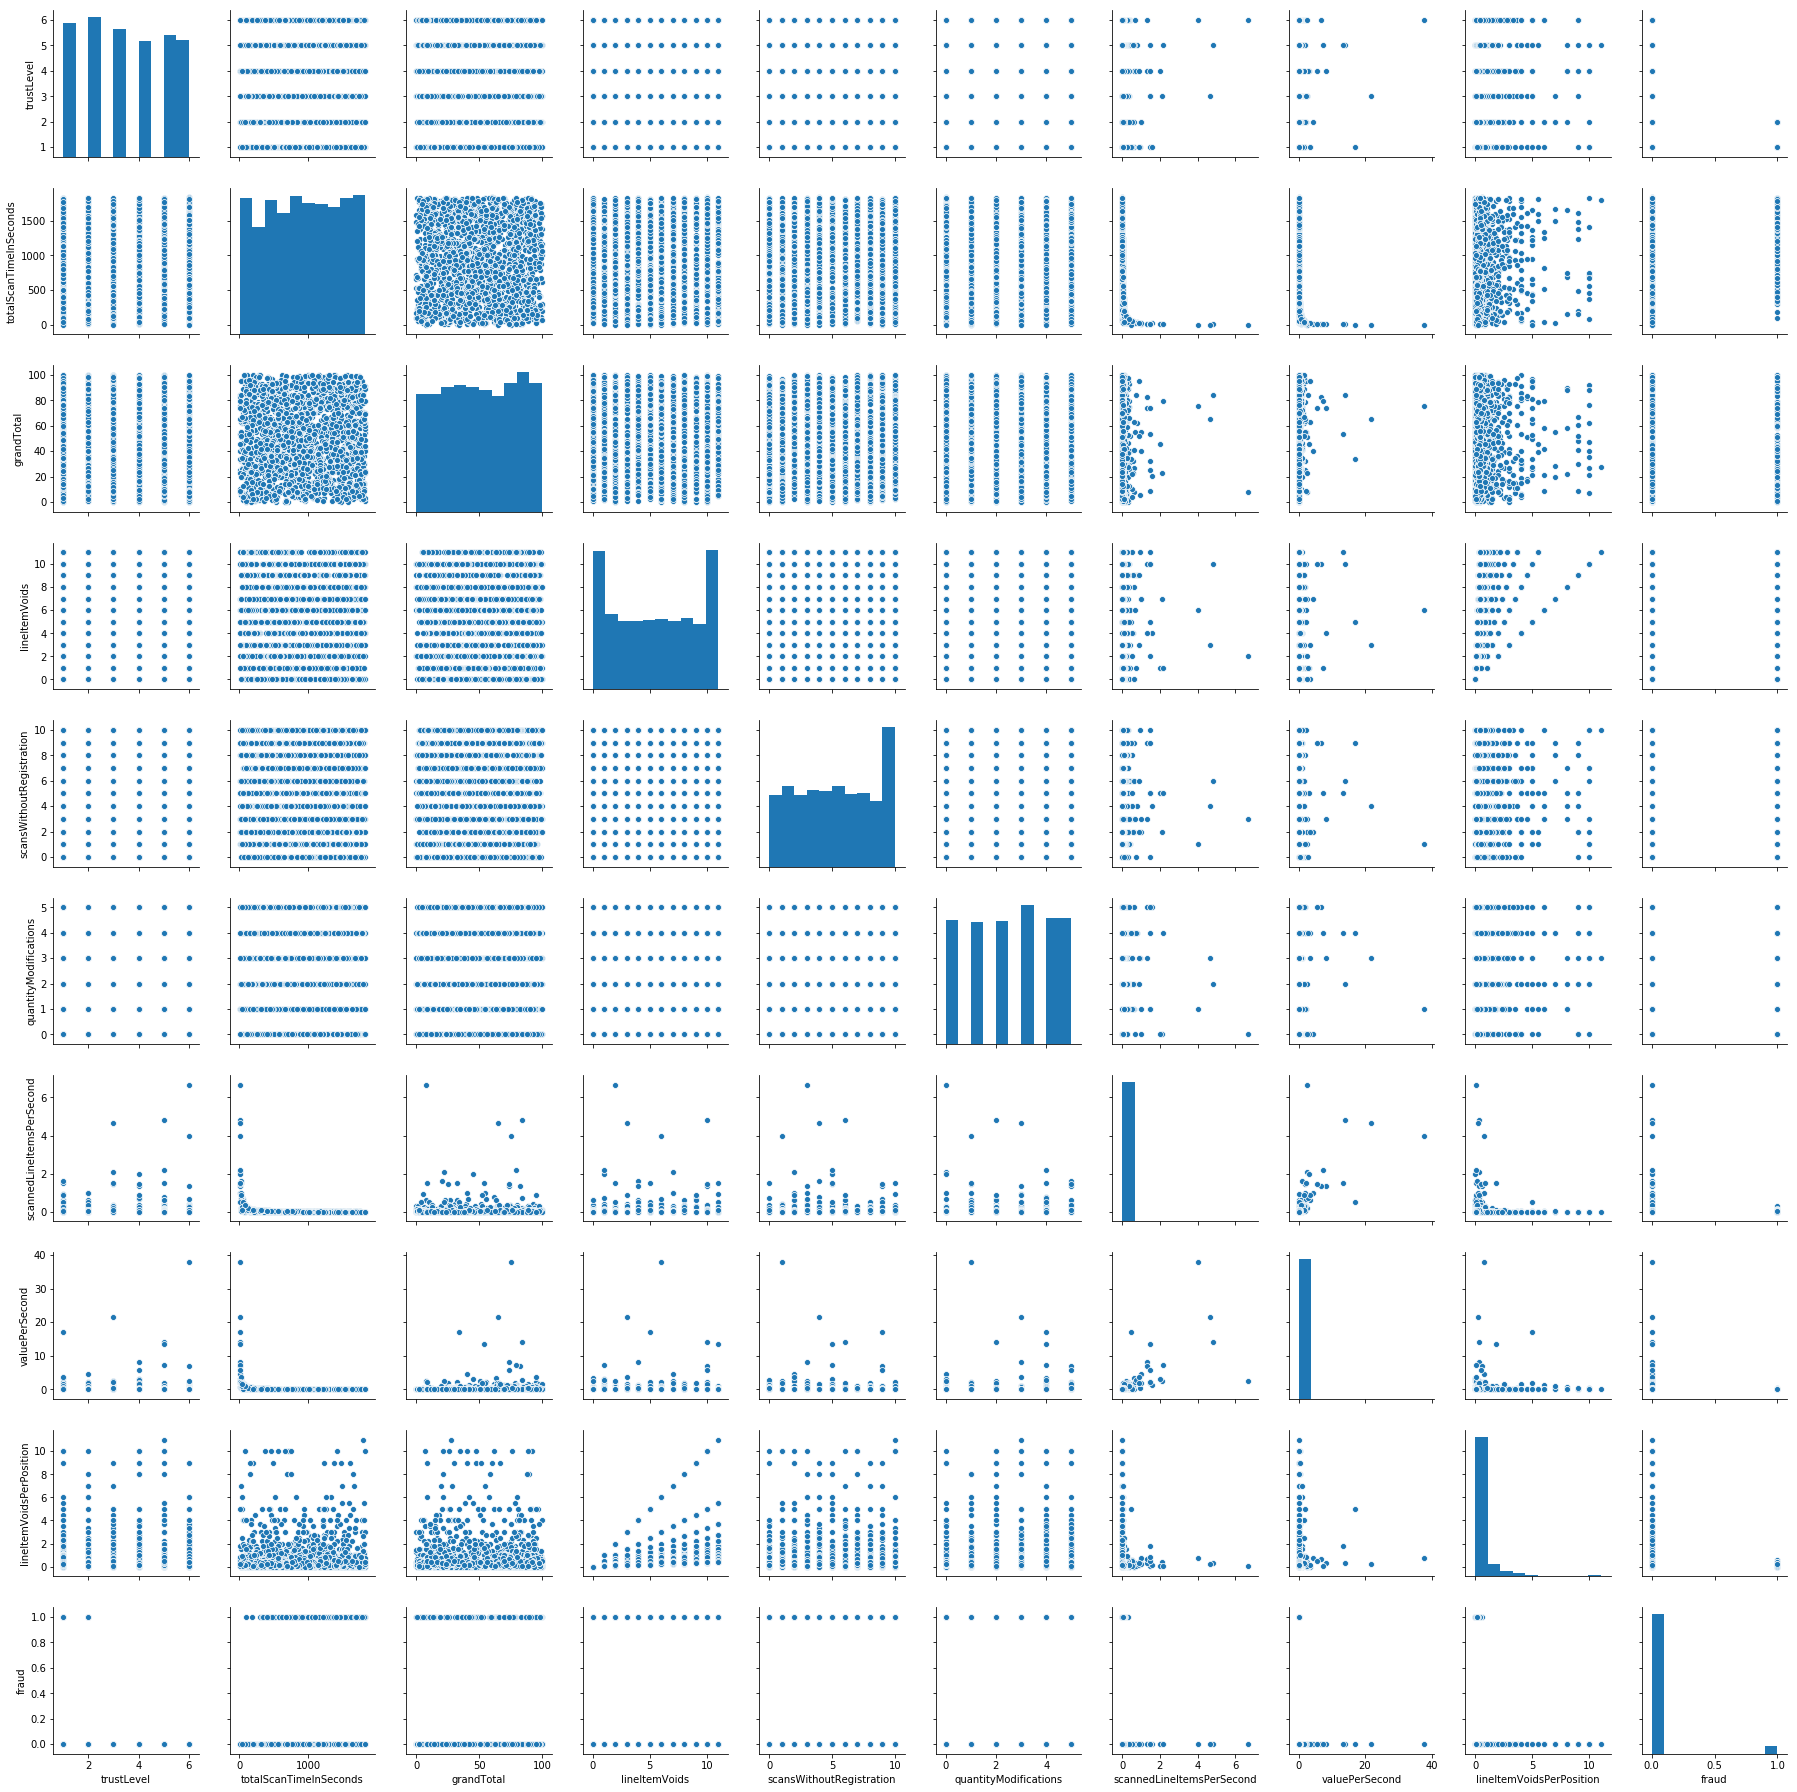

In [15]:
sns.pairplot(train)

In [16]:
data.hist(figsize=(20,15))

NameError: name 'data' is not defined

<h1 style="font-size:3em; color:royalblue">Additional exploration</h1>

In [ ]:
data.groupby(['fraud']).mean()['trustLevel'].plot.bar()
plt.xlabel('Fraud')
plt.ylabel('Average Trust Level')
plt.title('Trust Level as an indicator for fraud')
plt.savefig('Trust Level Fraud.jpg')